<a href="https://colab.research.google.com/github/vn322/Sport-University/blob/main/esport/%D0%9A%D0%BE%D0%BC%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%80%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Установка необходимых библиотек (выполнять один раз)
!pip install -q nltk spacy wordcloud matplotlib networkx

# Загрузка русской модели spaCy
!python -m spacy download ru_core_news_sm

import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

import re
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 86.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Загрузите файл с расширением .txt


Saving cont.txt to cont.txt
ТОП-20 униграмм:
стрлис: 43
сейчс: 43
тки: 42
ндо: 36
вроры: 35
пок: 33
првд: 32
девйс: 32
игрок: 29
врор: 29
говорить: 27
смом: 25
дело: 25
итог: 25
рунд: 25
кстти: 21
дже: 21
сторона: 20
время: 19
выходить: 18

ТОП-20 биграмм:
смом дело: 24
кстти говорить: 11
друг сторона: 9
игрок вроры: 5
следующий рунд: 3
грнты полететь: 3
говорить ребят: 3
остётся последний: 3
итог збрл: 3
молик полететь: 3
хороший новость: 3
против вроры: 2
яби последний: 2
турецкий коллектив: 2
стрлис попробовть: 2
соств стрлис: 2
девйс последний: 2
ребят улица: 2
улица полностью: 2
полностью пустя: 2

ТОП-20 триграмм:
ребят улица полностью: 2
улица полностью пустя: 2
полностью пустя сейчс: 2
оствляет желть хороший: 2
смом дело ротция: 2
рскид грнты полететь: 2
игра проблема стртуют: 1
проблема стртуют сторона: 1
стртуют сторона нбирть: 1
сторона нбирть думю: 1
нбирть думю тогд: 1
думю тогд претендовть: 1
тогд претендовть победа: 1
претендовть победа чуточку: 1
победа чуточку глвное: 

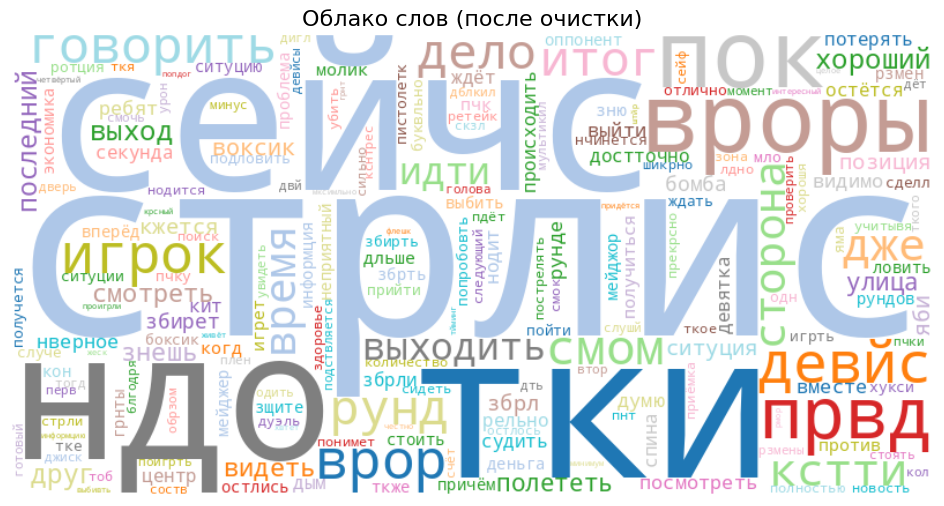

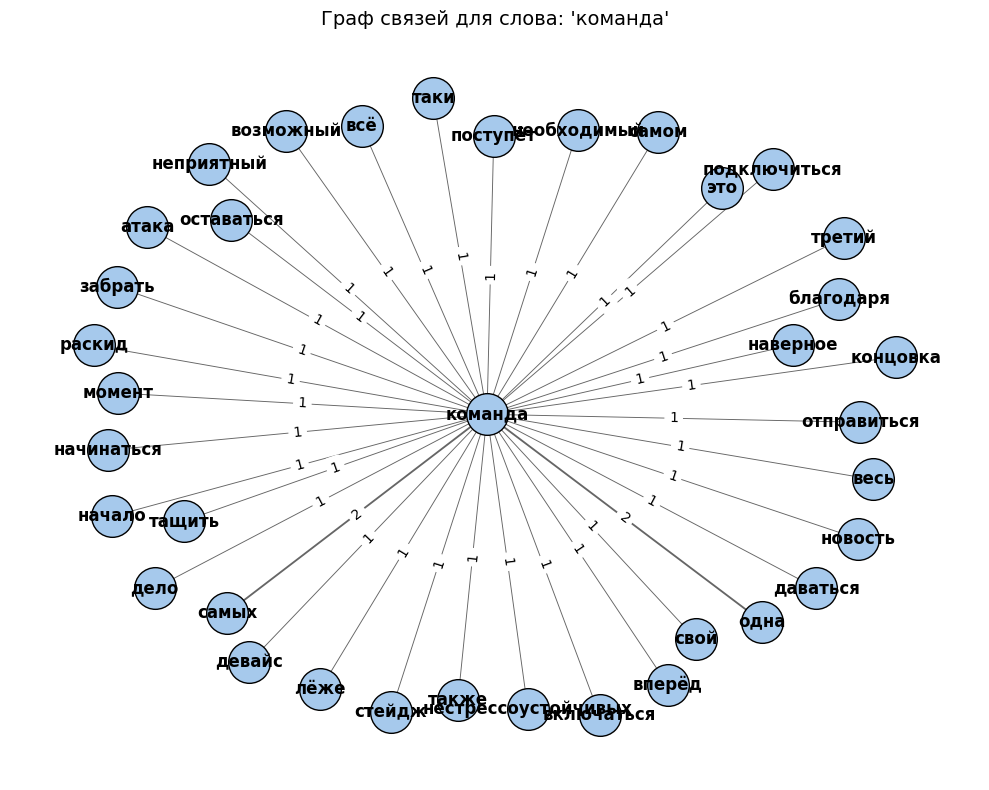

In [2]:

# Загрузка модели и стоп-слов
nlp = spacy.load("ru_core_news_sm")
russian_stopwords = set(stopwords.words("russian"))

# Эмоциональные паттерны (регулярные выражения)
emotional_patterns = [
    r'о[о]+го+', r'вау', r'ух\s*ты', r'боже', r'ну\s+что\s+за', r'круто', r'фантастика',
    r'невероятно', r'жесть', r'отпад', r'класс', r'огонь', r'ух[х]*', r'аа+[а]*',
    r'ой', r'нуу+[у]*', r'просто', r'прямо', r'очень', r'совсем', r'вообще', r'а+[а]*х*[х]*',
    r'у+[у]*ра+', r'скилл', r'гг', r'лол', r'пздц', r'бб'
]
emotional_re = re.compile('|'.join(emotional_patterns), re.IGNORECASE)

def preprocess_text(text):
    # Удаляем эмоциональные всплески
    text = emotional_re.sub('', text)

    doc = nlp(text)
    tokens = []
    for token in doc:
        # Пропускаем именованные сущности
        if token.ent_type_ in {'PER', 'PERSON', 'ORG', 'GPE', 'LOC', 'MISC'}:
            continue
        # Пропускаем всё лишнее
        if token.is_stop or token.is_punct or token.like_num or len(token.lemma_) < 3:
            continue
        lemma = token.lemma_.lower()
        # Оставляем только русские слова
        if re.fullmatch("[а-яё]+", lemma):
            tokens.append(lemma)
    return tokens

# Загрузка файла
from google.colab import files
print("Загрузите файл с расширением .txt")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
with open(filename, 'r', encoding='utf-8') as f:
    raw_text = f.read()

# Предобработка
clean_tokens = preprocess_text(raw_text)

if not clean_tokens:
    print("После предобработки не осталось слов. Проверьте текст или настройки фильтрации.")
else:
    # N-граммы
    unigrams = clean_tokens
    bigrams = list(ngrams(clean_tokens, 2))
    trigrams = list(ngrams(clean_tokens, 3))

    top_unigrams = Counter(unigrams).most_common(20)
    top_bigrams = Counter(bigrams).most_common(20)
    top_trigrams = Counter(trigrams).most_common(20)

    print("ТОП-20 униграмм:")
    for word, freq in top_unigrams:
        print(f"{word}: {freq}")

    print("\nТОП-20 биграмм:")
    for gram, freq in top_bigrams:
        print(f"{' '.join(gram)}: {freq}")  # ← ИСПРАВЛЕНО: закрыта кавычка и скобка

    print("\nТОП-20 триграмм:")
    for gram, freq in top_trigrams:
        print(f"{' '.join(gram)}: {freq}")  # ← ИСПРАВЛЕНО аналогично

    # Облако слов
    wordcloud_text = ' '.join(unigrams)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='tab20', collocations=False, random_state=42).generate(wordcloud_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Облако слов (после очистки)", fontsize=16)
    plt.show()

    # Граф связей
    target_word = "команда"  # ← можно изменить

    #sentences = sent_tokenize(raw_text.lower())
    doc = nlp(raw_text)
    sentences = [sent.text for sent in doc.sents]
    context_graph = Counter()

    for sent in sentences:
        doc = nlp(sent)
        words = []
        for token in doc:
            if token.ent_type_ in {'PER', 'PERSON', 'ORG', 'GPE', 'LOC', 'MISC'}:
                continue
            lemma = token.lemma_.lower()
            if (lemma not in russian_stopwords and
                re.fullmatch("[а-яё]+", lemma) and len(lemma) >= 3):
                words.append(lemma)
        if target_word in words:
            for w in words:
                if w != target_word:
                    context_graph[(target_word, w)] += 1

    if context_graph:
        G = nx.Graph()
        for (w1, w2), freq in context_graph.items():
            G.add_edge(w1, w2, weight=freq)

        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G, k=2, seed=42)
        nx.draw_networkx_nodes(G, pos, node_size=900, node_color='#a6c9ec', edgecolors='black')
        nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

        weights = [d['weight'] for u, v, d in G.edges(data=True)]
        nx.draw_networkx_edges(G, pos, width=[w/1.5 for w in weights], alpha=0.6)

        edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

        plt.title(f"Граф связей для слова: '{target_word}'", fontsize=14)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Слово '{target_word}' не найдено в очищенном тексте или не имеет контекстов.")

In [ ]:
# Установка (всё в одной ячейке Colab)
!pip install -q nltk spacy wordcloud matplotlib networkx pymorphy3

# Загрузка spaCy модели
!python -m spacy download ru_core_news_sm

import nltk
nltk.download('stopwords', quiet=True)


Загрузите текстовый файл (.txt) с речью комментатора


Saving cont.txt to cont (1).txt
ТОП-20 униграмм:
это: 126
всё: 75
ещё: 69
сейчс: 43
рунд: 43
врор: 39
ндо: 36
првда: 32
игрок: 29
говорить: 27
см: 25
дело: 25
итог: 25
кстти: 21
дже: 21
свой: 21
сторона: 20
идти: 20
время: 19
который: 19

ТОП-20 биграмм:
см дело: 24
кстти говорить: 11
всё ещё: 11
друг сторона: 9
судить весь: 8
игрок врор: 5
это кстти: 5
свой оппонент: 5
единица здоровье: 4
свой тиммейт: 4
следующий рунд: 4
всё рвный: 4
збрлить это: 3
это говорить: 3
это это: 3
грнт полететь: 3
это всё: 3
сейчс ещё: 3
говорить ребята: 3
остуться последний: 3

ТОП-20 триграмм:
это кстти говорить: 3
это хороший новость: 3
всё ещё жить: 3
ребята улица полностью: 2
улица полностью пустя: 2
полностью пустя сейчс: 2
ситуция см дело: 2
оствлять желть хороший: 2
см дело это: 2
см дело ротция: 2
это судить весь: 2
см дело всё: 2
рскид грнт полететь: 2
всё ещё ждать: 2
збрлить это сделла: 2
который кстти говорить: 2
единица здоровье иметь: 2
именно это происходить: 2
игра проблема действительно: 

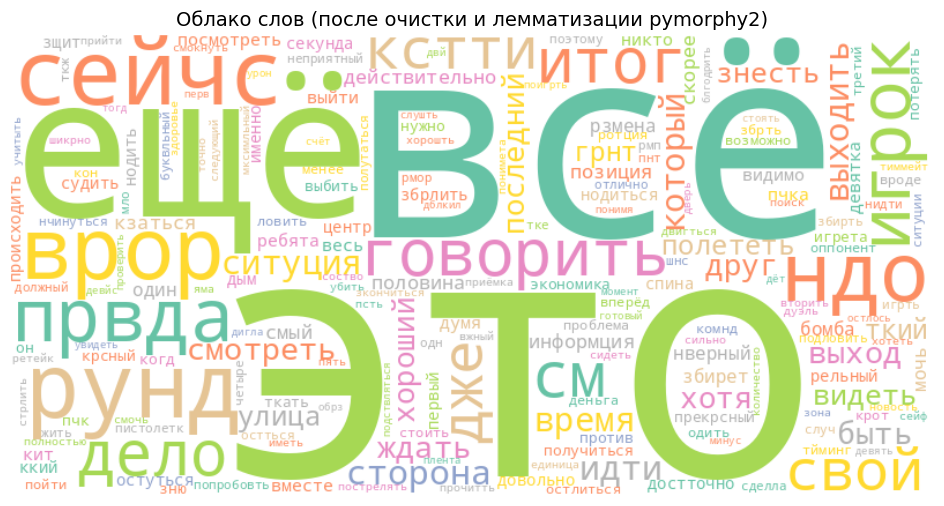

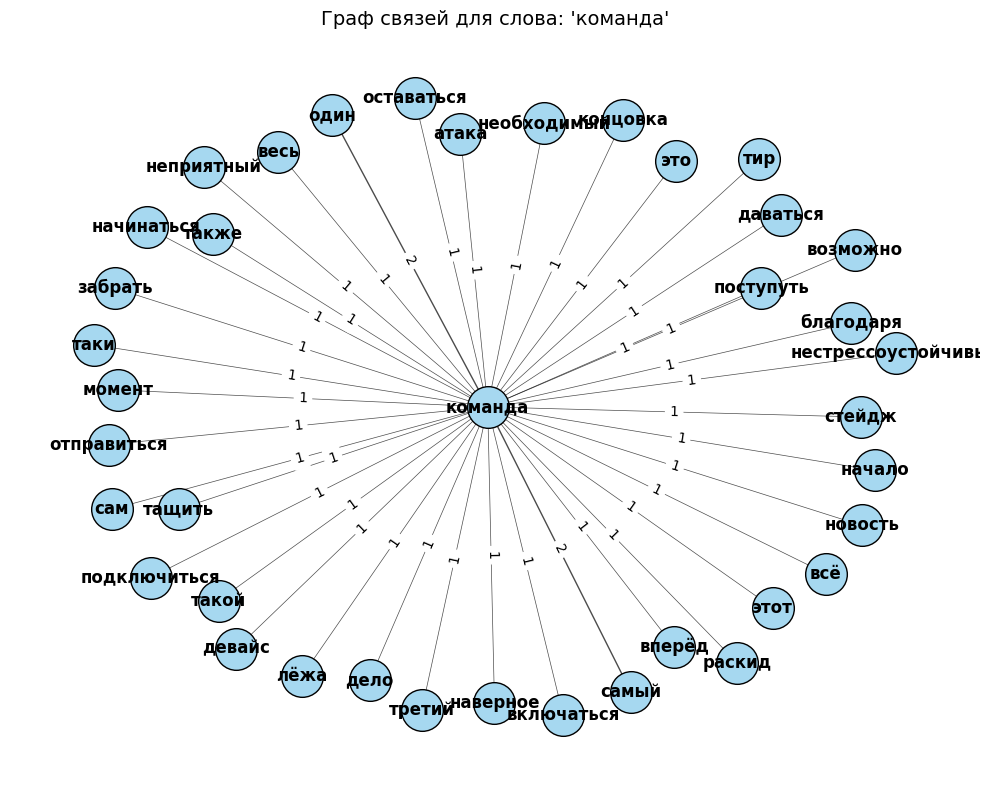

In [3]:

import re
import spacy
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx
import pymorphy3

# Инициализация
nlp = spacy.load("ru_core_news_sm")
morph = pymorphy3.MorphAnalyzer(lang='ru')  # ← работает в Python 3.12
russian_stopwords = set(stopwords.words("russian"))


# Эмоциональные паттерны
emotional_patterns = [
    r'о[о]+го+', r'вау', r'ух\s*ты', r'боже', r'ну\s+что\s+за', r'круто', r'фантастика',
    r'невероятно', r'жесть', r'отпад', r'класс', r'огонь', r'ух[х]*', r'аа+[а]*',
    r'ой', r'нуу+[у]*', r'просто', r'прямо', r'очень', r'совсем', r'вообще', r'а+[а]*х*[х]*',
    r'у+[у]*ра+', r'лол', r'гг', r'скилл', r'пздц', r'бб', r'флэш'
]
emotional_re = re.compile('|'.join(emotional_patterns), re.IGNORECASE)

def preprocess_text(text):
    # Удаляем эмоции
    text = emotional_re.sub('', text)

    # Используем spaCy ТОЛЬКО для извлечения именованных сущностей
    doc = nlp(text)
    ner_tokens = set()
    for ent in doc.ents:
        if ent.label_ in {'PER', 'PERSON', 'ORG', 'GPE', 'LOC', 'MISC'}:
            # Добавляем все слова из сущности в список на удаление
            for token in ent:
                ner_tokens.add(token.text.lower())

    # Теперь разбиваем текст на слова (просто по whitespace + пунктуация)
    # Удаляем пунктуацию и приводим к нижнему регистру
    words = re.findall(r"[а-яё]+", text.lower())

    clean_tokens = []
    for word in words:
        if word in ner_tokens:
            continue
        if word in russian_stopwords or len(word) < 3:
            continue
        # Лемматизация через pymorphy2
        parsed = morph.parse(word)[0]
        lemma = parsed.normal_form
        if re.fullmatch(r"[а-яё]+", lemma):
            clean_tokens.append(lemma)

    return clean_tokens

# Загрузка файла
from google.colab import files
print("Загрузите текстовый файл (.txt) с речью комментатора")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
with open(filename, 'r', encoding='utf-8') as f:
    raw_text = f.read()

# Предобработка
clean_tokens = preprocess_text(raw_text)

if not clean_tokens:
    print("После очистки не осталось слов. Проверьте входной текст.")
else:
    from nltk.util import ngrams

    # N-граммы
    unigrams = clean_tokens
    bigrams = list(ngrams(clean_tokens, 2))
    trigrams = list(ngrams(clean_tokens, 3))

    top_unigrams = Counter(unigrams).most_common(20)
    top_bigrams = Counter(bigrams).most_common(20)
    top_trigrams = Counter(trigrams).most_common(20)

    print("ТОП-20 униграмм:")
    for word, freq in top_unigrams:
        print(f"{word}: {freq}")

    print("\nТОП-20 биграмм:")
    for gram, freq in top_bigrams:
        print(f"{' '.join(gram)}: {freq}")

    print("\nТОП-20 триграмм:")
    for gram, freq in top_trigrams:
        print(f"{' '.join(gram)}: {freq}")

    # Облако слов
    wordcloud_text = ' '.join(unigrams)
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='Set2', collocations=False, random_state=42).generate(wordcloud_text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Облако слов (после очистки и лемматизации pymorphy2)", fontsize=14)
    plt.show()

    # === Граф связей ===
    target_word = "команда"  # ← измените при необходимости

    # Разбиваем исходный текст на предложения с помощью простого разделения по .!?
    sentences = re.split(r'[.!?]+', raw_text)
    context_graph = Counter()

    for sent in sentences:
        if not sent.strip():
            continue
        # Получаем леммы и фильтруем, как в preprocess_text, но сохраняем список слов в предложении
        words = re.findall(r"[а-яё]+", sent.lower())
        ner_in_sent = set()
        doc_sent = nlp(sent)
        for ent in doc_sent.ents:
            if ent.label_ in {'PER', 'PERSON', 'ORG', 'GPE', 'LOC', 'MISC'}:
                for token in ent:
                    ner_in_sent.add(token.text.lower())

        lemmas = []
        for w in words:
            if w in ner_in_sent or w in russian_stopwords or len(w) < 3:
                continue
            try:
                lemma = morph.parse(w)[0].normal_form
                if re.fullmatch(r"[а-яё]+", lemma):
                    lemmas.append(lemma)
            except:
                continue

        if target_word in lemmas:
            for w in lemmas:
                if w != target_word:
                    context_graph[(target_word, w)] += 1

    if context_graph:
        G = nx.Graph()
        for (w1, w2), freq in context_graph.items():
            G.add_edge(w1, w2, weight=freq)

        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G, k=2, seed=42)
        nx.draw_networkx_nodes(G, pos, node_size=900, node_color='#a6d8f0', edgecolors='black')
        nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
        weights = [d['weight'] for u, v, d in G.edges(data=True)]
        nx.draw_networkx_edges(G, pos, width=[w / 2 for w in weights], alpha=0.7)
        edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
        plt.title(f"Граф связей для слова: '{target_word}'", fontsize=14)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Слово '{target_word}' не найдено в очищенных данных или не имеет связей.")

# вроде норм

In [4]:
# УСТАНОВКА ЗАВИСИМОСТЕЙ
!pip install -q spacy wordcloud matplotlib networkx pymorphy3

# Загрузка русской модели spaCy (для NER)
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 69.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Загрузите .txt файл с речью комментатора


Saving cont.txt to cont (8).txt
ТОП-20 униграмм:
сам: 30
забрать: 26
знать: 25
говорить: 24
дело: 24
такой: 23
свой: 21
сторона: 20
ждать: 20
хороший: 19
время: 19
выходить: 19
пойти: 17
остаться: 17
один: 17
быть: 17
хотя: 16
играть: 16
видеть: 15
фрага: 15

ТОП-20 биграмм:
сам дело: 24
судить весь: 8
свой оппонент: 5
единица здоровье: 4
свой тиммейт: 4
два игрок: 3
важный дуэль: 3
хороший новость: 3
любой случай: 3
третий карта: 3
гореть гореть: 3
забрать неприятный: 2
турецкий коллектив: 2
остаться сам: 2
знать пойти: 2
пойти играть: 2
поиск какой: 2
улица полностью: 2
полностью пустой: 2
дропаться вниз: 2

ТОП-20 триграмм:
улица полностью пустой: 2
оставлять желать хороший: 2
сам дело ротация: 2
давать судить весь: 2
раскид гранат полететь: 2
попытать свой счастие: 2
единица здоровье иметь: 2
гореть гореть гореть: 2
игра действительно сторона: 1
действительно сторона нужно: 1
сторона нужно восемь: 1
нужно восемь девять: 1
восемь девять претендовать: 1
девять претендовать победа: 1


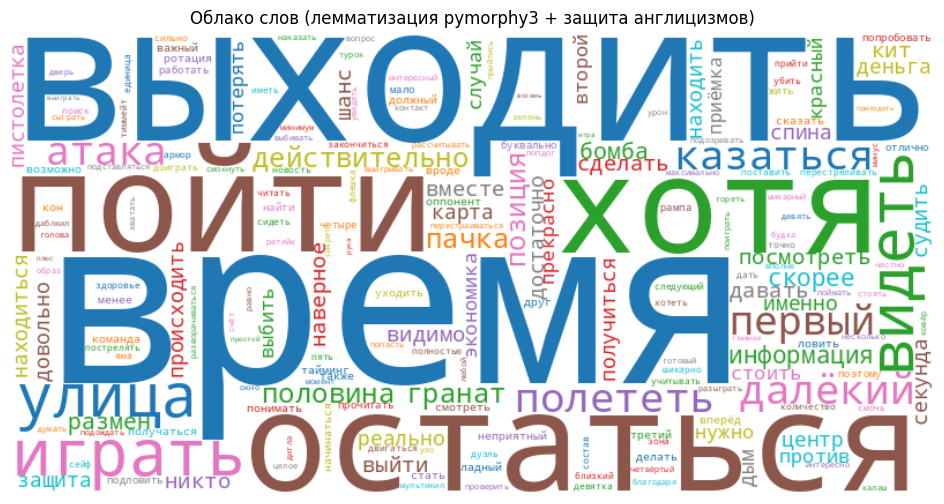

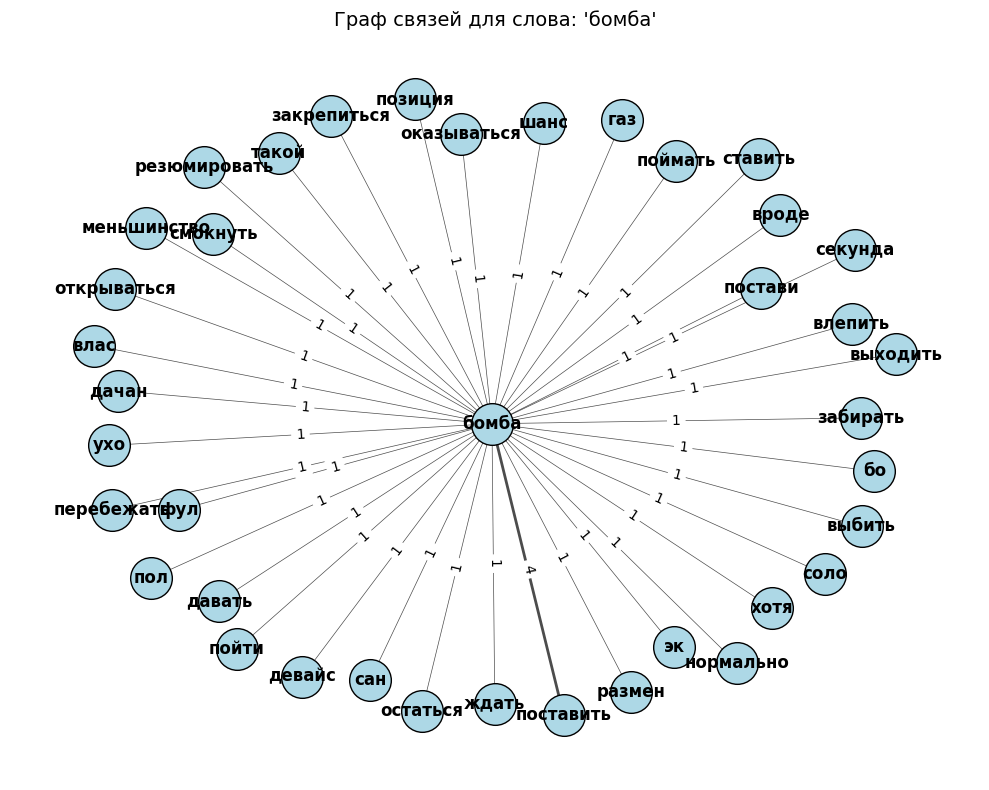

In [41]:

import re
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx
import pymorphy3

# === ИНИЦИАЛИЗАЦИЯ ===
nlp = spacy.load("ru_core_news_sm")
morph = pymorphy3.MorphAnalyzer(lang='ru')

# Стоп-слова из NLTK + кастомные
russian_stopwords = set([
    'это', 'весь', 'сам', 'самый', 'который', 'такой', 'все', 'всё', 'мочь', 'ещё',
    'только', 'даже', 'сейчас', 'здесь', 'там', 'очень', 'просто', 'прямо', 'вообще',
    'совсем', 'немного', 'какой', 'свой', 'наш', 'ваш', 'их', 'его', 'её', 'ихний',
    'таки', 'раунд', 'ребята', 'говорить', 'правда', 'пока', 'игрок', 'раунд', 'сам',
    'итог', 'забрать', 'дело', 'ситуация', 'знать', 'такой', 'кстати', 'ждать', 'говорить', 'хороший',
    'последний', 'игрок', 'забирать'
] +
 ['девайс', 'хукси', 'аврора', 'авроры', 'мейджер', 'раундов', 'астралис', 'воксик', 'ребята', 'думаю', 'викадия', 'астрали',
  'итоги', 'ксантарес', 'какие', 'викади', 'игрока', 'ситуации', 'ситуация', 'воксика', 'вторая', 'а', 'итоге', 'проиграли', 'раунд',
   'девятку', 'выход', 'поспешили', 'поставленная', 'стартуют', 'забирать', 'вышла', 'смотри', 'остается', 'фанатов', 'абсолютная', 'скромно',
   'остаётся', 'попробует', 'пачку', 'проблема', 'раунда', 'слушай', 'кт', 'понимает', 'макси', 'викадий', 'говот', 'вокси', 'набирать',
  'викати', 'тридцатка', 'фрага', 'идти', 'сторона'])

# Добавим NLTK-стоп-слова, если доступны
try:
    import nltk
    from nltk.corpus import stopwords
    nltk.download('stopwords', quiet=True)
    russian_stopwords.update(stopwords.words('russian'))
except:
    pass

# Эмоциональные триггеры
emotional_re = re.compile(
    r'\b(ого|вау|ух\W*ты|боже|круто|фантастика|невероятно|жесть|отпад|класс|огонь|ой|лол|гг|бб|скилл|пздц|а+[аох]+|у+ра+)\b',
    re.IGNORECASE
)

# Слова, которые НЕ лемматизируем — оставляем как есть (киберспортивные англицизмы)
KEEP_AS_IS = {
    'скилл', 'флэш', 'флеш', 'клaтч', 'клатч', 'рейт', 'пуш', 'a', 'b', 'mid', 'site',
    'eco', 'pistol', 'buy', 'smoke', 'molotov', 'he', 'awp', 'deagle', 'ak', 'm4'
}

def lemmatize_word(word: str) -> str:
    word_lower = word.lower()
    if word_lower in KEEP_AS_IS:
        return word_lower
    parses = morph.parse(word)
    # Выбираем самый вероятный разбор с высоким скором
    best = max(parses, key=lambda p: p.score if hasattr(p, 'score') else 1.0)
    lemma = best.normal_form
    return lemma if re.fullmatch(r'[а-яёa-z]+', lemma) else word_lower

def preprocess_text(text: str):
    # 1. Удаляем эмоции
    text = emotional_re.sub('', text)

    # 2. Получаем список слов (только буквы кириллицы + латиница для англицизмов)
    tokens_raw = re.findall(r"[а-яёa-z]+", text.lower())

    # 3. Удаляем NER через spaCy
    doc = nlp(text)
    ner_words = set()
    for ent in doc.ents:
        if ent.label_ in {'PER', 'PERSON', 'ORG', 'GPE', 'LOC', 'MISC'}:
            for token in ent:
                ner_words.add(token.text.lower())

    # 4. Фильтрация и лемматизация
    clean = []
    for word in tokens_raw:
        if word in ner_words:
            continue
        if word in russian_stopwords or len(word) < 2:
            continue
        lemma = lemmatize_word(word)
        clean.append(lemma)
    return clean

# === ЗАГРУЗКА ДАННЫХ ===
from google.colab import files
print("Загрузите .txt файл с речью комментатора")
uploaded = files.upload()
filename = next(iter(uploaded))
with open(filename, 'r', encoding='utf-8') as f:
    raw_text = f.read()

# === ОБРАБОТКА ===
tokens = preprocess_text(raw_text)

if not tokens:
    print("⚠ После обработки не осталось слов.")
else:
    from nltk.util import ngrams

    unigrams = tokens
    bigrams = list(ngrams(tokens, 2))
    trigrams = list(ngrams(tokens, 3))

    print("ТОП-20 униграмм:")
    for w, f in Counter(unigrams).most_common(20):
        print(f"{w}: {f}")

    print("\nТОП-20 биграмм:")
    for g, f in Counter(bigrams).most_common(20):
        print(f"{' '.join(g)}: {f}")

    print("\nТОП-20 триграмм:")
    for g, f in Counter(trigrams).most_common(20):
        print(f"{' '.join(g)}: {f}")

    # Облако слов
    wc = WordCloud(width=800, height=400, background_color='white', stopwords=russian_stopwords,
                   colormap='tab10', collocations=False, random_state=42).generate(' '.join(unigrams))
    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title("Облако слов (лемматизация pymorphy3 + защита англицизмов)")
    plt.show()

    # === ГРАФ СВЯЗЕЙ ===
    target = "бомба"

    # Разбиваем на предложения (просто по . ! ?)
    sentences = [s.strip() for s in re.split(r'[.!?]+', raw_text) if s.strip()]
    graph = Counter()

    for sent in sentences:
        sent_tokens = re.findall(r"[а-яёa-z]+", sent.lower())
        # Удаляем NER в предложении
        sent_doc = nlp(sent)
        ner_in_sent = {t.text.lower() for ent in sent_doc.ents if ent.label_ in {'PER','ORG','GPE'} for t in ent}
        lemmas = []
        for w in sent_tokens:
            if w in ner_in_sent or w in russian_stopwords or len(w) < 2:
                continue
            lemmas.append(lemmatize_word(w))
        if target in lemmas:
            for w in lemmas:
                if w != target:
                    graph[(target, w)] += 1

    if graph:
        G = nx.Graph()
        for (a, b), w in graph.items():
            G.add_edge(a, b, weight=w)
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G, k=2, seed=42)
        nx.draw_networkx_nodes(G, pos, node_size=900, node_color='#add8e6', edgecolors='k')
        nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
        weights = [d['weight'] for u, v, d in G.edges(data=True)]
        nx.draw_networkx_edges(G, pos, width=[w/2 for w in weights], alpha=0.7)
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d['weight'] for u,v,d in G.edges(data=True)}, font_size=10)
        plt.title(f"Граф связей для слова: '{target}'", fontsize=14)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Слово '{target}' не найдено в контексте.")

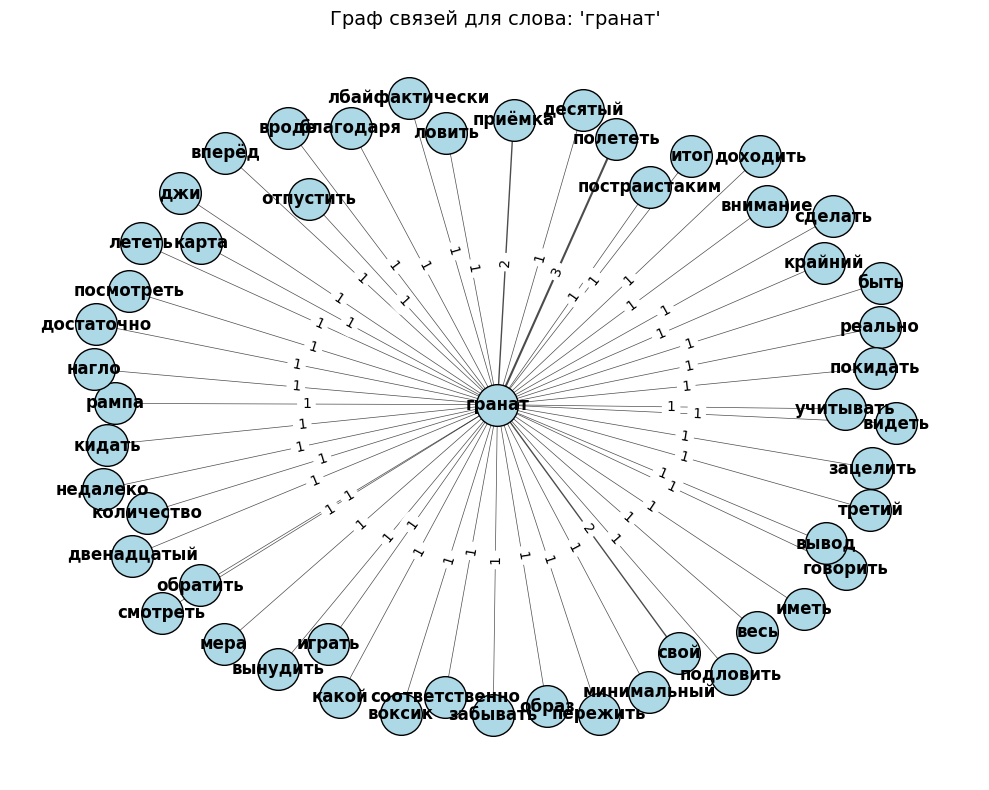

In [38]:

    # === ГРАФ СВЯЗЕЙ ===
    target = "гранат"

    # Разбиваем на предложения (просто по . ! ?)
    sentences = [s.strip() for s in re.split(r'[.!?]+', raw_text) if s.strip()]
    graph = Counter()

    for sent in sentences:
        sent_tokens = re.findall(r"[а-яёa-z]+", sent.lower())
        # Удаляем NER в предложении
        sent_doc = nlp(sent)
        ner_in_sent = {t.text.lower() for ent in sent_doc.ents if ent.label_ in {'PER','ORG','GPE'} for t in ent}
        lemmas = []
        for w in sent_tokens:
            if w in ner_in_sent or w in russian_stopwords or len(w) < 2:
                continue
            lemmas.append(lemmatize_word(w))
        if target in lemmas:
            for w in lemmas:
                if w != target:
                    graph[(target, w)] += 1

    if graph:
        G = nx.Graph()
        for (a, b), w in graph.items():
            G.add_edge(a, b, weight=w)
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G, k=2, seed=42)
        nx.draw_networkx_nodes(G, pos, node_size=900, node_color='#add8e6', edgecolors='k')
        nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
        weights = [d['weight'] for u, v, d in G.edges(data=True)]
        nx.draw_networkx_edges(G, pos, width=[w/2 for w in weights], alpha=0.7)
        nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v):d['weight'] for u,v,d in G.edges(data=True)}, font_size=10)
        plt.title(f"Граф связей для слова: '{target}'", fontsize=14)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Слово '{target}' не найдено в контексте.")

# старое

# подготовка

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Подготовка данных

In [7]:
cont = pd.read_csv('/content/cont.txt', on_bad_lines='skip')
cont = cont.dropna()
cont

,,,1 ИГРА
Проблема действительно есть,но они стартуют за КТ- сторону. Нужно набирать как можно больше,я думаю,восемь или
установить. Ну это правда с другой стороны,слушай,Девайс тоже проапгрейдился. И там уже не дигл,там тридцатка. Мейджер битый. Жта
ещё и поставленная бомба. Это,конечно,это готов его как-то реализовывать. Пока что ж у нас всё-таки понимает то,что
что очень приятно. Более того,спина жмётся Викадий,"который тоже собирает. Говот: ""Ребята",а улица-то полностью
пустая,а я сейчас как им в спину-то зайду,а если на ноль вернуться,"то тут просто такая формёжка для нас вообще"". И"
...,...,...,...
реально стоять очень крепко. В частности,тому же Хукси. До этого,кстати,играл довольно неплохо. В
Ещё забрал 17 на12. Ну,Хукси,хейтеры,вы где?
раунда подряд проиграли. Давай так,винить придётся Нюкскорее то,что он то ли недоразобран,то ли ещё
Причём дочека у него дабл девайс,который смотрел ему Crossossфire. С другой стороны,если был бы размен один в один,это было бы плохое убивание ямы.


In [8]:
 #!pip install nltk  # раскомментировать, если нужно

In [9]:
df = cont.copy()

# wordcloud

In [10]:
pip install wordcloud

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
cont = pd.read_csv('/content/cont.txt', on_bad_lines='skip')
cont = cont.dropna()
cont

,,,1 ИГРА
Проблема действительно есть,но они стартуют за КТ- сторону. Нужно набирать как можно больше,я думаю,восемь или
установить. Ну это правда с другой стороны,слушай,Девайс тоже проапгрейдился. И там уже не дигл,там тридцатка. Мейджер битый. Жта
ещё и поставленная бомба. Это,конечно,это готов его как-то реализовывать. Пока что ж у нас всё-таки понимает то,что
что очень приятно. Более того,спина жмётся Викадий,"который тоже собирает. Говот: ""Ребята",а улица-то полностью
пустая,а я сейчас как им в спину-то зайду,а если на ноль вернуться,"то тут просто такая формёжка для нас вообще"". И"
...,...,...,...
реально стоять очень крепко. В частности,тому же Хукси. До этого,кстати,играл довольно неплохо. В
Ещё забрал 17 на12. Ну,Хукси,хейтеры,вы где?
раунда подряд проиграли. Давай так,винить придётся Нюкскорее то,что он то ли недоразобран,то ли ещё
Причём дочека у него дабл девайс,который смотрел ему Crossossфire. С другой стороны,если был бы размен один в один,это было бы плохое убивание ямы.


In [26]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cont.to_string())

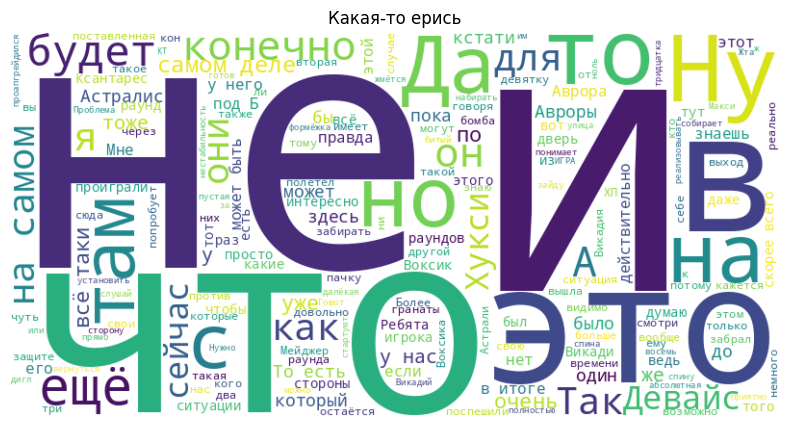

In [27]:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Какая-то ерись")
    plt.show()

In [15]:
stopw = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/refs/heads/main/%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D1%8F%D0%B7%D1%8B%D0%BA%D0%B0%20Python%20%D0%B4%D0%BB%D1%8F%20%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BD%D0%B0%D1%83%D1%87%D0%BD%D1%8B%D1%85%20%D0%B8%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B9%20%D0%B2%20%D0%B5%D0%B4%D0%B8%D0%BD%D0%BE%D0%B1%D0%BE%D1%80%D1%81%D1%82%D0%B2%D0%B0%D1%85/stop-ru.txt')
stopw = stopw['а'].tolist()
stopw= stopw + ['девайс', 'хукси', 'аврора', 'авроры', 'мейджер', 'раундов', 'астралис', 'воксик', 'ребята', 'думаю', 'викадия', 'астрали',
                'итоги', 'ксантарес', 'какие', 'викади', 'игрока', 'ситуации', 'ситуация', 'воксика', 'вторая', 'а', 'итоге', 'проиграли', 'раунд',
                'девятку', 'выход', 'поспешили', 'поставленная', 'стартуют', 'забирать', 'вышла', 'смотри', 'остается', 'фанатов', 'абсолютная', 'скромно',
                'остаётся', 'попробует', 'пачку', 'проблема', 'раунда', 'слушай', 'кт', 'понимает', 'макси', 'викадий', 'говот', 'вокси', 'набирать', 'викати', 'тридцатка']
wordCloud = WordCloud(width = 1000, height = 1000, random_state=1,
                      background_color='white',
                      collocations=False, stopwords=stopw, max_words=150).generate(cont.to_string())


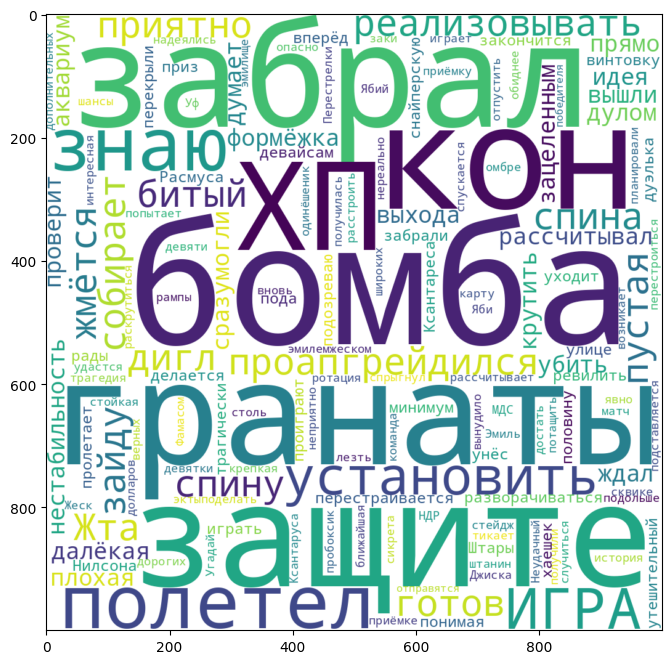

In [16]:
plt.figure(figsize=(10, 8))
plt.imshow(wordCloud, interpolation='bilinear')

# графики

In [17]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import string
import matplotlib.pyplot as plt
import networkx as nx

In [18]:
df.columns = ['comment']

In [45]:
df['comment']

,,,comment
Проблема действительно есть,но они стартуют за КТ- сторону. Нужно набирать как можно больше,я думаю,восемь или
установить. Ну это правда с другой стороны,слушай,Девайс тоже проапгрейдился. И там уже не дигл,там тридцатка. Мейджер битый. Жта
ещё и поставленная бомба. Это,конечно,это готов его как-то реализовывать. Пока что ж у нас всё-таки понимает то,что
что очень приятно. Более того,спина жмётся Викадий,"который тоже собирает. Говот: ""Ребята",а улица-то полностью
пустая,а я сейчас как им в спину-то зайду,а если на ноль вернуться,"то тут просто такая формёжка для нас вообще"". И"
...,...,...,...
реально стоять очень крепко. В частности,тому же Хукси. До этого,кстати,играл довольно неплохо. В
Ещё забрал 17 на12. Ну,Хукси,хейтеры,вы где?
раунда подряд проиграли. Давай так,винить придётся Нюкскорее то,что он то ли недоразобран,то ли ещё
Причём дочека у него дабл девайс,который смотрел ему Crossossфire. С другой стороны,если был бы размен один в один,это было бы плохое убивание ямы.


In [58]:
# Загрузка стоп-слов и пунктуации
#nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
#stop_words = stopw
punctuation = set(string.punctuation)

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if token not in punctuation]
    return tokens

# Применяем к датафрейму
df['tokens'] = df['comment'].apply(preprocess_text)
all_tokens = [token for tokens in df['tokens'] for token in tokens]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
# Униграммы
unigrams = Counter(all_tokens)

# Биграммы
bigrams = Counter(ngrams(all_tokens, 2))

# Триграммы
trigrams = Counter(ngrams(all_tokens, 3))

# Вывод топ-10
print("Top 10 Unigrams:", unigrams.most_common(10))
print("\nTop 10 Bigrams:", bigrams.most_common(10))
print("\nTop 10 Trigrams:", trigrams.most_common(10))

Top 10 Unigrams: [('битый', 1), ('жта', 1), ('формёжка', 1), ('крутить', 1), ('дулом', 1), ('плохая', 1), ('идея', 1), ('сразумогли', 1), ('утешительный', 1), ('приз', 1)]

Top 10 Bigrams: [(('битый', 'жта'), 1), (('жта', 'формёжка'), 1), (('формёжка', 'крутить'), 1), (('крутить', 'дулом'), 1), (('дулом', 'плохая'), 1), (('плохая', 'идея'), 1), (('идея', 'сразумогли'), 1), (('сразумогли', 'утешительный'), 1), (('утешительный', 'приз'), 1), (('приз', 'перекрыли'), 1)]

Top 10 Trigrams: [(('битый', 'жта', 'формёжка'), 1), (('жта', 'формёжка', 'крутить'), 1), (('формёжка', 'крутить', 'дулом'), 1), (('крутить', 'дулом', 'плохая'), 1), (('дулом', 'плохая', 'идея'), 1), (('плохая', 'идея', 'сразумогли'), 1), (('идея', 'сразумогли', 'утешительный'), 1), (('сразумогли', 'утешительный', 'приз'), 1), (('утешительный', 'приз', 'перекрыли'), 1), (('приз', 'перекрыли', 'трагически'), 1)]


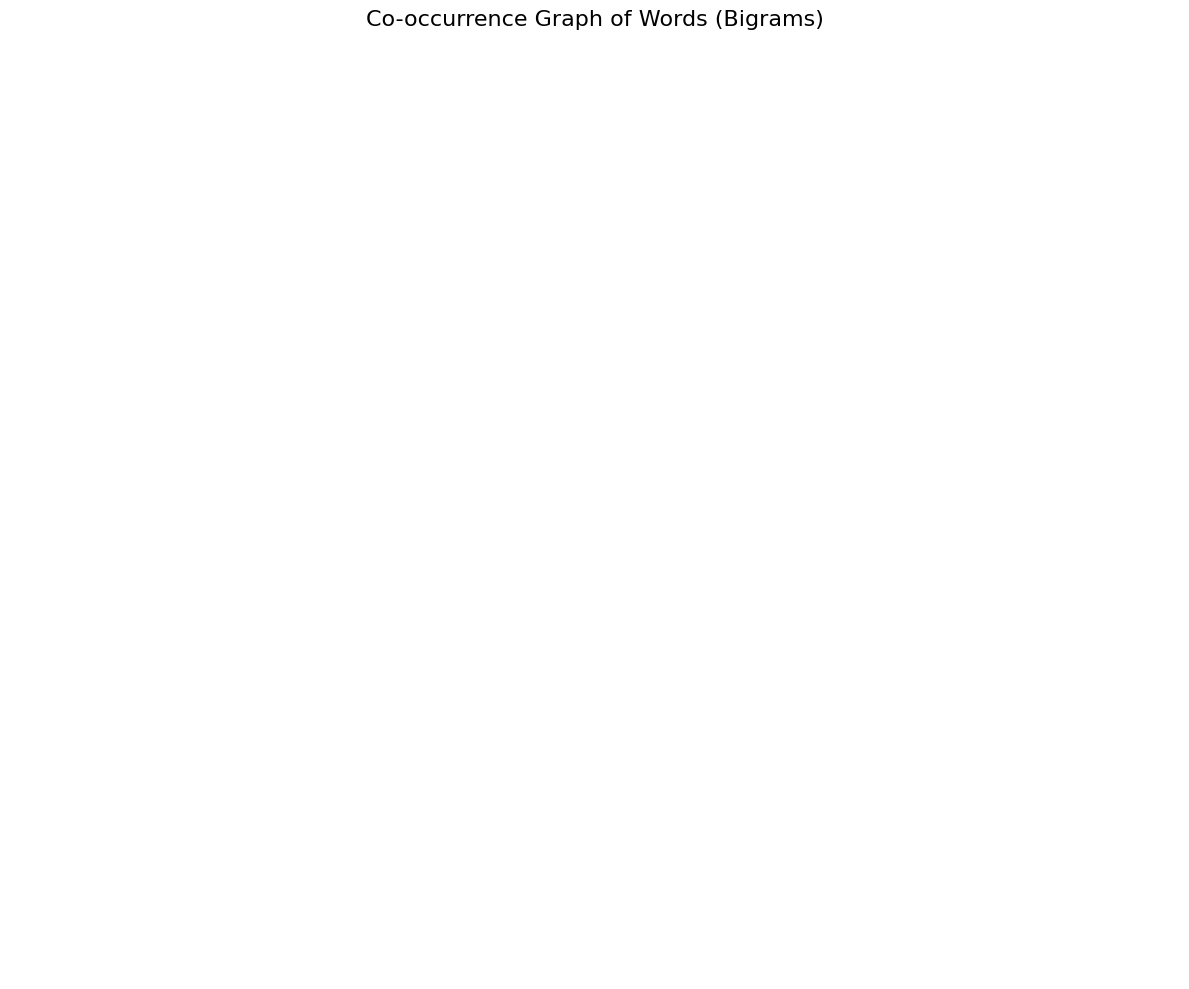

In [57]:
# Создаём граф
G = nx.Graph()

# Добавляем рёбра из биграмм
for (w1, w2), freq in bigrams.items():
    if freq >= 2:  # фильтр по частоте (можно изменить)
        G.add_edge(w1, w2, weight=freq)

# Визуализация
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # для воспроизводимости

# Рисуем узлы
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

# Рисуем рёбра с толщиной = весу
edges = G.edges(data=True)
weights = [d['weight'] for (u, v, d) in edges]
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.6)

# Подписи узлов
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Подписи весов рёбер
edge_labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Co-occurrence Graph of Words (Bigrams)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [31]:
df

,,,comment,tokens
Проблема действительно есть,но они стартуют за КТ- сторону. Нужно набирать как можно больше,я думаю,восемь или,"[восемь, или]"
установить. Ну это правда с другой стороны,слушай,Девайс тоже проапгрейдился. И там уже не дигл,там тридцатка. Мейджер битый. Жта,"[там, тридцатка, мейджер, битый, жта]"
ещё и поставленная бомба. Это,конечно,это готов его как-то реализовывать. Пока что ж у нас всё-таки понимает то,что,[что]
что очень приятно. Более того,спина жмётся Викадий,"который тоже собирает. Говот: ""Ребята",а улица-то полностью,"[а, полностью]"
пустая,а я сейчас как им в спину-то зайду,а если на ноль вернуться,"то тут просто такая формёжка для нас вообще"". И","[то, тут, просто, такая, формёжка, для, нас, в..."
...,...,...,...,...
реально стоять очень крепко. В частности,тому же Хукси. До этого,кстати,играл довольно неплохо. В,"[играл, довольно, неплохо, в]"
Ещё забрал 17 на12. Ну,Хукси,хейтеры,вы где?,"[вы, где]"
раунда подряд проиграли. Давай так,винить придётся Нюкскорее то,что он то ли недоразобран,то ли ещё,"[то, ли, ещё]"
Причём дочека у него дабл девайс,который смотрел ему Crossossфire. С другой стороны,если был бы размен один в один,это было бы плохое убивание ямы.,"[это, было, бы, плохое, убивание, ямы]"


In [32]:
# Установка библиотек (выполняется один раз)
#!pip install pandas nltk matplotlib networkx

# Импорты
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter, defaultdict
import string
import matplotlib.pyplot as plt
import networkx as nx

# Загрузка ресурсов NLTK
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)



# === 2. Предобработка текста ===
stop_words = set(stopwords.words('russian'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

df['tokens'] = df['comment'].apply(preprocess_text)
all_tokens = [token for tokens in df['tokens'] for token in tokens]

# === 3. Сбор биграмм и построение словаря соседей ===
bigrams = list(ngrams(all_tokens, 2))
bigram_counter = Counter(bigrams)

# Создадим словарь: для каждого слова — список соседей и весов
cooccurrence = defaultdict(Counter)
for (w1, w2), freq in bigram_counter.items():
    cooccurrence[w1][w2] += freq
    cooccurrence[w2][w1] += freq  # граф ненаправленный

# === 4. Выбор целевого слова и построение подграфа ===
target_word = "граната"  # ← ЗАМЕНИТЕ НА ЛЮБОЕ СЛОВО ИЗ ТЕКСТА

if target_word not in cooccurrence:
    print(f"Слово '{target_word}' не найдено в текстах или было удалено при предобработке.")
else:
    # Фильтрация: только связи с весом >= min_weight
    min_weight = 1  # можно увеличить, например, до 2
    neighbors = {
        word: weight for word, weight in cooccurrence[target_word].items()
        if weight >= min_weight
    }

    if not neighbors:
        print(f"У слова '{target_word}' нет связей с весом ≥ {min_weight}.")
    else:
        # Создаём подграф
        G = nx.Graph()
        G.add_node(target_word, color='red')

        for word, weight in neighbors.items():
            G.add_node(word, color='lightblue')
            G.add_edge(target_word, word, weight=weight)

        # Визуализация
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(G, seed=42)

        # Цвета узлов
        node_colors = ['red' if node == target_word else 'lightblue' for node in G.nodes()]

        # Рисуем узлы
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)

        # Рисуем рёбра
        edges = G.edges(data=True)
        weights = [d['weight'] for u, v, d in edges]
        nx.draw_networkx_edges(G, pos, width=weights, alpha=0.7, edge_color='gray')

        # Метки узлов
        nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

        # Метки весов рёбер
        edge_labels = {(u, v): f"{d['weight']}" for u, v, d in edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='darkred')

        plt.title(f"Co-occurrence Graph for '{target_word}'", fontsize=16)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

        # Вывод списка связей
        print(f"\nСвязи слова '{target_word}':")
        for word, weight in sorted(neighbors.items(), key=lambda x: -x[1]):
            print(f"  {word}: {weight}")

Слово 'граната' не найдено в текстах или было удалено при предобработке.


In [33]:
x= df.to_dict()
x

{'comment': {('Проблема действительно есть',
   ' но они стартуют за КТ- сторону. Нужно набирать как можно больше',
   ' я думаю'): ' восемь или',
  ('установить. Ну это правда с другой стороны',
   ' слушай',
   ' Девайс тоже проапгрейдился. И там уже не дигл'): ' там тридцатка. Мейджер битый. Жта',
  ('ещё и поставленная бомба. Это',
   ' конечно',
   ' это готов его как-то реализовывать. Пока что ж у нас всё-таки понимает то'): ' что',
  ('что очень приятно. Более того',
   ' спина жмётся Викадий',
   ' который тоже собирает. Говот: "Ребята'): ' а улица-то полностью',
  ('пустая',
   ' а я сейчас как им в спину-то зайду',
   ' а если на ноль вернуться'): ' то тут просто такая формёжка для нас вообще". И',
  ('Да',
   ' у него есть такая вот нестабильность',
   ' на самом деле. Это абсолютная правда. далёкая'): ' на самом',
  ('Ну',
   ' Макси прямо рассчитывал то',
   ' что его всё-таки не проверит. Ты знаешь'): ' лишний раз крутить дулом в этой ситуации тоже была плохая идея. А то 